In [1]:
import torch

In [26]:
e = torch.load(r"C:\Users\lorenzo\Desktop\datasets\EMBL_combined_no_j_proteins_embeddings.pt")

In [23]:
(list(e.keys()))

['AM156909.1|CAJ42206.1',
 'FR852584.1|CCA65818.1',
 'AJ242593.1|CAB53843.1',
 'FR751545.1|CBY88534.1',
 'FR852584.1|CCA65834.1',
 'FM163528.1|CAQ57800.1',
 'LN681538.1|CEK40617.1',
 'HE981739.1|CCL97654.1',
 'HE858210.2|CCK74037.1',
 'X60322.1|CAA42880.1',
 'FR852584.1|CCA65835.1',
 'X60323.1|CAA42890.1',
 'FN391954.1|CAY56546.1',
 'V00657.1|CAA24018.1',
 'AJ251805.1|CAB63598.1',
 'X96987.2|CAC21544.1',
 'AJ318471.1|CAC86269.1',
 'HE611333.2|CCE60764.1',
 'AJ242593.1|CAB53857.1',
 'AM910650.1|CAP45406.1',
 'HE981739.1|CCL97692.1',
 'AJ242593.1|CAB53836.1',
 'HE858210.2|CCK74075.1',
 'HE956711.1|CCI88953.1',
 'HE956711.1|CCI88967.1',
 'X96987.2|CAC21517.1',
 'FN667789.1|CBJ94380.1',
 'AJ318471.1|CAC86284.1',
 'X14336.1|CAA32515.1',
 'V01146.1|CAA24395.1',
 'LN681538.1|CEK40604.1',
 'AJ242593.1|CAB53848.1',
 'X52107.1|CAA36329.1',
 'AM156909.1|CAJ42210.1',
 'HG428758.1|CDL18809.1',
 'LK985321.1|CDU85321.1',
 'FM887021.1|CAT99660.1',
 'HE981739.1|CCL97611.1',
 'HE858210.2|CCK73994.1',
 '

In [19]:
len(e['AM156909.1|CAJ42206.1']['mean_representations'][29])

640

In [24]:
import torch
from collections import defaultdict

# Example structure of `e` (replace this with your actual tensor data)
# e = {
#     'AM156909.1|CAJ42206.1': {'mean_representations': torch.rand(30, 1024)},
#     'AM156909.1|CAJ42207.1': {'mean_representations': torch.rand(30, 1024)},
#     'XYZ123456.1|PROT5678': {'mean_representations': torch.rand(30, 1024)},
# }

# Select the desired layer
layer_index = 15

# Dictionary to group embeddings by virus
virus_embeddings = defaultdict(list)

# Iterate through the data and group embeddings by virus
for key, value in e.items():
    virus_name = key.split('|')[0]  # Extract virus_name from <virus_name>|<protein_name>
    layer_embedding = value['mean_representations'][layer_index]  # Extract 15th layer
    virus_embeddings[virus_name].append(layer_embedding)

# Compute the average embeddings for each virus
virus_avg_embeddings = {}
for virus, embeddings in virus_embeddings.items():
    stacked_embeddings = torch.stack(embeddings)  # Stack embeddings into a tensor
    avg_embedding = torch.mean(stacked_embeddings, dim=0)  # Compute mean along 0th axis
    virus_avg_embeddings[virus] = avg_embedding

# `virus_avg_embeddings` now contains the average embeddings for the selected layer
print(virus_avg_embeddings)


{'AM156909.1': tensor([0.2820, 0.4286, 0.3712,  ..., 0.4013, 0.5064, 0.6390]), 'XYZ123456.1': tensor([0.5938, 0.2191, 0.5803,  ..., 0.8570, 0.5179, 0.5159])}


In [25]:
virus_avg_embeddings

{'AM156909.1': tensor([0.2820, 0.4286, 0.3712,  ..., 0.4013, 0.5064, 0.6390]),
 'XYZ123456.1': tensor([0.5938, 0.2191, 0.5803,  ..., 0.8570, 0.5179, 0.5159])}

In [39]:
import torch
import pandas as pd
from collections import defaultdict

# Example structure of `e` (replace this with your actual tensor data)
e_tst = {
    'AM156909.1|CAJ42206.1': {'mean_representations': torch.rand(30, 1024)},
    'AM156909.1|CAJ42207.1': {'mean_representations': torch.rand(30, 1024)},
    'XYZ123456.1|PROT5678': {'mean_representations': torch.rand(30, 1024)},
}

# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# # Move embeddings to GPU
# for key, value in e.items():
#     value['mean_representations'] = value['mean_representations'].to(device)

# # Rest of the code operates on GPU tensors


# Select the desired layer
layer_index = 15

# Step 1: Extract virus, protein names, and embeddings in a single loop
data = {
    "virus_name": [],
    "embeddings": []
}

for key, value in e.items():
    virus_name = key.split('|')[0]  # Extract virus_name
    layer_embedding = value['mean_representations'][layer_index]  # Extract the desired layer
    data["virus_name"].append(virus_name)
    data["embeddings"].append(layer_embedding)

# Step 2: Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Step 3: Group by virus and compute mean using PyTorch
virus_avg_embeddings = df.groupby("virus_name")["embeddings"].apply(
    lambda group: torch.stack(group.tolist()).mean(dim=0)
).to_dict()

(virus_avg_embeddings)


{'AJ006589.3': tensor([-1.2312e+00,  4.4527e-02, -2.5333e-01, -2.6322e-01,  9.3665e-01,
         -5.8679e-02, -7.2695e-01, -6.9869e-01, -4.9672e-01, -6.7932e-01,
          4.3129e-01, -1.0528e+00, -2.8471e-01,  6.2134e-01,  1.0780e-01,
          2.9853e-01, -5.1248e-01, -1.5066e-01, -8.4829e-01, -2.8427e-01,
         -1.0481e-01, -2.2413e-01, -5.8251e-01,  1.1244e-01, -6.2440e-01,
         -3.5933e-01,  8.3182e-01, -6.4166e-01, -1.1833e-01,  4.1268e-01,
          4.4357e-01, -6.2196e-01,  1.9728e-01, -7.9752e-02, -6.6701e-02,
         -6.6388e-01, -6.0481e-01, -1.6419e-01,  3.4329e-01, -7.3579e-02,
          1.6076e-01,  2.0709e-01,  7.8900e-01, -5.2081e-01, -6.7483e-01,
          4.6173e-01,  1.8922e-01, -2.3332e-01, -2.8221e-01,  1.0931e-01,
          4.1701e-01,  8.9518e-01, -6.5816e-01, -1.0635e+00,  1.2108e+00,
         -9.8718e-01,  4.2749e-01, -2.4631e-01, -5.8194e-01,  6.1590e-01,
          1.3670e-01,  4.0234e-01, -2.3495e-02, -3.4785e-01,  4.4043e-02,
          3.0294e-01,  1

In [36]:
from joblib import Parallel, delayed

# Function to process a single virus group
def process_group(virus, embeddings):
    stacked_embeddings = torch.stack(embeddings)
    return virus, torch.mean(stacked_embeddings, dim=0)

# Group embeddings by virus
virus_embeddings = defaultdict(list)
for key, value in e.items():
    virus_name = key.split('|')[0]
    layer_embedding = value['mean_representations'][layer_index]
    virus_embeddings[virus_name].append(layer_embedding)

# Parallelize the averaging step
results = Parallel(n_jobs=-1)(delayed(process_group)(virus, embeddings) for virus, embeddings in virus_embeddings.items())

# Convert results to a dictionary
virus_avg_embeddings = dict(results)


In [37]:
virus_avg_embeddings

{'AM156909.1': tensor([-1.2244e+00, -3.5223e-02, -1.6372e-01, -4.3866e-01,  7.6474e-01,
         -2.4817e-01, -4.8533e-01, -6.7258e-01, -4.5052e-01, -5.2182e-01,
          6.9221e-01, -9.5536e-01, -3.7071e-01,  4.7136e-01,  7.6663e-05,
          3.5509e-01, -5.2092e-01,  1.0243e-01, -8.2386e-01, -2.4534e-01,
          9.3739e-02, -7.8978e-02, -4.3717e-01,  2.1687e-01, -6.2530e-01,
         -2.7625e-01,  1.0245e+00, -7.6082e-01, -2.3173e-02,  6.0851e-01,
          3.2223e-01, -6.5584e-01,  1.7839e-01,  1.6788e-01,  9.5911e-02,
         -6.1517e-01, -6.6571e-01, -6.8138e-02,  5.2174e-01, -6.4683e-02,
          6.9578e-02,  1.2088e-01,  8.7043e-01, -6.4022e-01, -8.3493e-01,
          5.1827e-01,  1.7891e-01, -4.3759e-01, -4.4618e-01,  4.1533e-01,
          3.7096e-01,  7.6719e-01, -8.0520e-01, -1.2282e+00,  1.1602e+00,
         -5.6111e-01,  3.3357e-01, -1.8463e-01, -5.6644e-01,  6.0064e-01,
          1.3758e-01,  6.1745e-01, -1.8255e-01, -2.0809e-01,  8.7959e-02,
          8.2210e-03,  1

In [35]:
type(virus_avg_embeddings)

dict

In [34]:
(list(virus_avg_embeddings.keys()))

['AJ006589.3',
 'AJ131519.1',
 'AJ242593.1',
 'AJ251805.1',
 'AJ270057.1',
 'AJ278322.4',
 'AJ298298.1',
 'AJ302074.2',
 'AJ312240.2',
 'AJ318471.1',
 'AJ505558.1',
 'AJ536073.2',
 'AJ550635.1',
 'AJ550940.2',
 'AJ556162.1',
 'AJ630128.1',
 'AJ697969.1',
 'AJ842011.2',
 'AJ969242.1',
 'AM040673.1',
 'AM084414.1',
 'AM084415.1',
 'AM156909.1',
 'AM183667.1',
 'AM265638.1',
 'AM265639.1',
 'AM491472.1',
 'AM749441.1',
 'AM910650.1',
 'AM910651.1',
 'CU468217.1',
 'FM163528.1',
 'FM180578.1',
 'FM201281.1',
 'FM201282.1',
 'FM207411.1',
 'FM887021.1',
 'FM897211.1',
 'FN263372.1',
 'FN297812.1',
 'FN391954.1',
 'FN422398.1',
 'FN422399.1',
 'FN594518.1',
 'FN667788.1',
 'FN667789.1',
 'FQ312032.1',
 'FQ482083.1',
 'FQ482084.1',
 'FQ482085.1',
 'FQ482086.1',
 'FR667955.1',
 'FR687252.1',
 'FR725450.1',
 'FR751545.1',
 'FR775895.2',
 'FR823298.1',
 'FR823450.1',
 'FR852584.1',
 'HE584812.1',
 'HE600015.1',
 'HE608841.1',
 'HE611333.2',
 'HE614281.1',
 'HE614282.1',
 'HE775250.1',
 'HE806280

# PCA

In [40]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import MaxAbsScaler
import psutil
from tqdm import tqdm

# Convert virus_avg_embeddings to a NumPy array
# Each row corresponds to a virus, and each column is a feature
virus_names = list(virus_avg_embeddings.keys())
embeddings = torch.stack(list(virus_avg_embeddings.values()))  # Stack tensors into a single tensor
embeddings_np = embeddings.cpu().numpy()  # Convert to NumPy array

# Step 1: Normalize the data
scaler = MaxAbsScaler()
embeddings_scaled = scaler.fit_transform(embeddings_np)  # Normalize the dense matrix

# Step 2: Calculate optimal chunk size for incremental PCA
# Estimate memory usage for one dense row
sample_row_dense = embeddings_scaled[0]
row_size_in_bytes = sample_row_dense.nbytes

# Get available memory and calculate chunk size
available_memory = psutil.virtual_memory().available
memory_headroom = 0.2
usable_memory = available_memory * (1 - memory_headroom)
chunk_size = int(usable_memory // row_size_in_bytes)
chunk_size = max(10, min(chunk_size, 1000))  # Ensure a reasonable chunk size
print(f"Using PCA chunk size: {chunk_size}")

# Step 3: Fit Incremental PCA
ipca_model = IncrementalPCA(n_components=50)
num_batches = (embeddings_scaled.shape[0] + chunk_size - 1) // chunk_size

print("Fitting Incremental PCA:")
for start in tqdm(range(0, embeddings_scaled.shape[0], chunk_size), total=num_batches, desc="Fitting PCA"):
    end = min(start + chunk_size, embeddings_scaled.shape[0])
    chunk = embeddings_scaled[start:end]
    ipca_model.partial_fit(chunk)

# Step 4: Transform the data in batches
X_pca = []
print("Transforming data with Incremental PCA:")
for start in tqdm(range(0, embeddings_scaled.shape[0], chunk_size), total=num_batches, desc="Transforming Data"):
    end = min(start + chunk_size, embeddings_scaled.shape[0])
    chunk = embeddings_scaled[start:end]
    X_pca.append(ipca_model.transform(chunk))

# Concatenate results into a single array
X_pca = np.vstack(X_pca)

# Step 5: Save the PCA-transformed data to disk
np.save("virus_avg_embeddings_pca.npy", X_pca)

# Save mapping of virus names to their PCA-transformed embeddings
virus_pca_dict = {virus: X_pca[i] for i, virus in enumerate(virus_names)}


Using PCA chunk size: 1000
Fitting Incremental PCA:


Fitting PCA: 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]


Transforming data with Incremental PCA:


Transforming Data: 100%|██████████| 1/1 [00:00<00:00, 39.29it/s]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
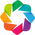

BokehModel(combine_events=True, render_bundle={'docs_json': {'fd837228-f38e-4ea0-8f8d-8492c81d6651': {'version…

In [41]:
#pip install jupyter-bokeh
import holoviews as hv
from holoviews.operation.datashader import datashade, shade, dynspread
import datashader as ds
import pandas as pd

from holoviews.plotting.util import process_cmap

import winsound
import colorcet as cc

hv.extension('bokeh')  # Enables interactive plots with the Bokeh backend

# Assuming X_pca and k are already defined
data = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1]})

# Convert the data to a HoloViews Points object
points = hv.Points(data, kdims=['PCA1', 'PCA2'])

# Use datashade to dynamically aggregate and render the points
interactive_plot = datashade(
    points,
    aggregator=ds.count(),
    cmap=cc.fire
)

# Optionally spread out sparse points for better visibility
interactive_plot = dynspread(interactive_plot, threshold=0.5, max_px=1000)

# Customize plot options
interactive_plot = interactive_plot.opts(
    title=f"PCA",
    xlabel="PCA Component 1",
    ylabel="PCA Component 2",
    width=800,
    height=600,
    xlim=(-1,3),
    ylim=(-1.5,1.5),
    tools=['box_zoom', 'pan', 'wheel_zoom', 'reset'],
    active_tools=['wheel_zoom'],
    bgcolor='black'
)

# Save the plot to a self-contained HTML file (non zoomable)
#hv.save(interactive_plot, f'PCA_plot.html', backend='bokeh')

#from datashader.utils import export_image
#export_image(interactive_plot, "out", background="black", export_path=".")

# Save the plot as a TIFF image
#hv.save(interactive_plot, f'PCA_plot_k{k}.png', fmt='png')

# Display the interactive plot in a Jupyter Notebook
interactive_plot

In [42]:
from umap.umap_ import UMAP
umap_model = UMAP(n_neighbors=5, min_dist=0.1, metric='cosine', low_memory=True)
X_umap = umap_model.fit_transform(X_pca)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
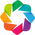

BokehModel(combine_events=True, render_bundle={'docs_json': {'5e166c80-b913-4153-92d0-af7400f8819d': {'version…

In [44]:
hv.extension('bokeh')  # Enables interactive plots with the Bokeh backend

# Assuming X_pca and k are already defined
data = pd.DataFrame({'UMAP1': X_umap[:, 0], 'UMAP2': X_umap[:, 1]})

# Convert the data to a HoloViews Points object
points = hv.Points(data, kdims=['UMAP1', 'UMAP2'])

# Use datashade to dynamically aggregate and render the points
interactive_plot = datashade(
    points,
    aggregator=ds.count(),
    cmap=cc.blues
)

# Optionally spread out sparse points for better visibility
#interactive_plot = dynspread(interactive_plot, threshold=0.5, max_px=4)

# Customize plot options
interactive_plot = interactive_plot.opts(
    title=f"UMAP projection after PCA reduction",
    xlabel="UMAP Component 1",
    ylabel="UMAP Component 2",
    width=800,
    height=600,
    tools=['box_zoom', 'pan', 'wheel_zoom', 'reset'],
    active_tools=['wheel_zoom'],
    bgcolor = 'black'
)

# Save the plot to a self-contained HTML file (non zoomable)
#hv.save(interactive_plot, f'UMAP_plot_k{k}.html', backend='bokeh')

# Display the interactive plot in a Jupyter Notebook
interactive_plot

# Create Distance matrix between virus embds

In [45]:
import torch
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Assuming `virus_avg_embeddings` is the dictionary from before
# Each key is a virus name, and each value is a PyTorch tensor of embeddings
virus_names = list(virus_avg_embeddings.keys())
embeddings = torch.stack(list(virus_avg_embeddings.values()))  # Stack tensors into a single tensor

# Convert embeddings to NumPy array for distance computation
embeddings_np = embeddings.cpu().numpy()  # Shape: (num_viruses, embedding_dim)

# Compute the pairwise distance matrix (e.g., Euclidean)
distance_matrix = squareform(pdist(embeddings_np, metric="euclidean"))

# Save the distance matrix to disk (optional)
np.save("virus_avg_distance_matrix.npy", distance_matrix)

# Create a labeled DataFrame (optional, for easier interpretation)
import pandas as pd
distance_df = pd.DataFrame(distance_matrix, index=virus_names, columns=virus_names)

# Save the distance DataFrame to a CSV file (optional)
distance_df.to_csv("virus_avg_distance_matrix.csv")

# Print a summary
print("Distance matrix shape:", distance_matrix.shape)


Distance matrix shape: (147, 147)


In [46]:
type(distance_matrix)

numpy.ndarray

C:\Users\lorenzo\AppData\Local\Temp\ipykernel_19920\3330200014.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


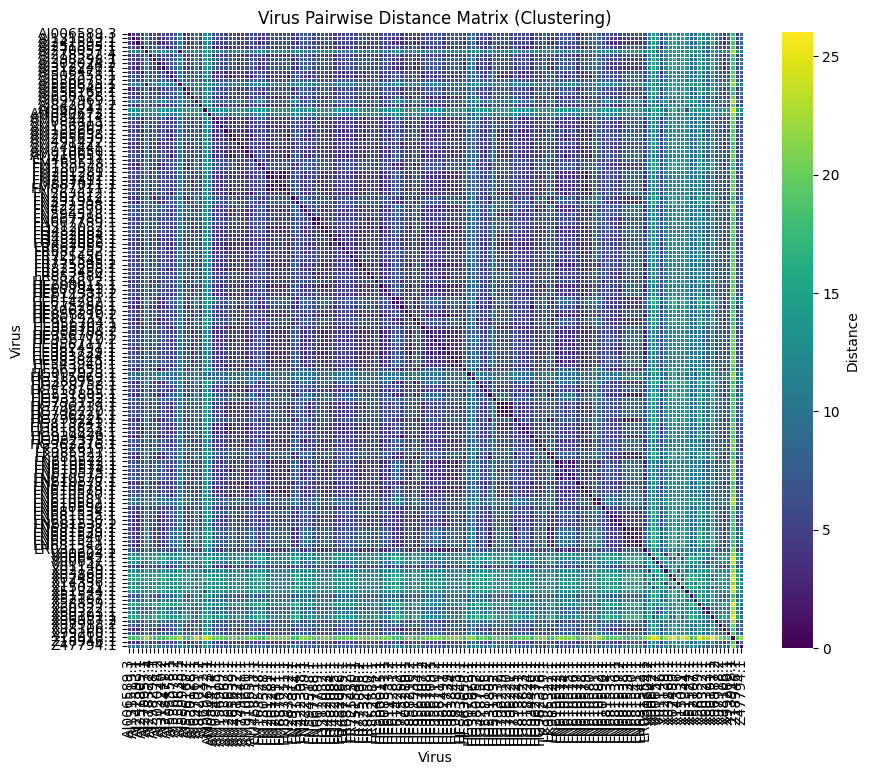

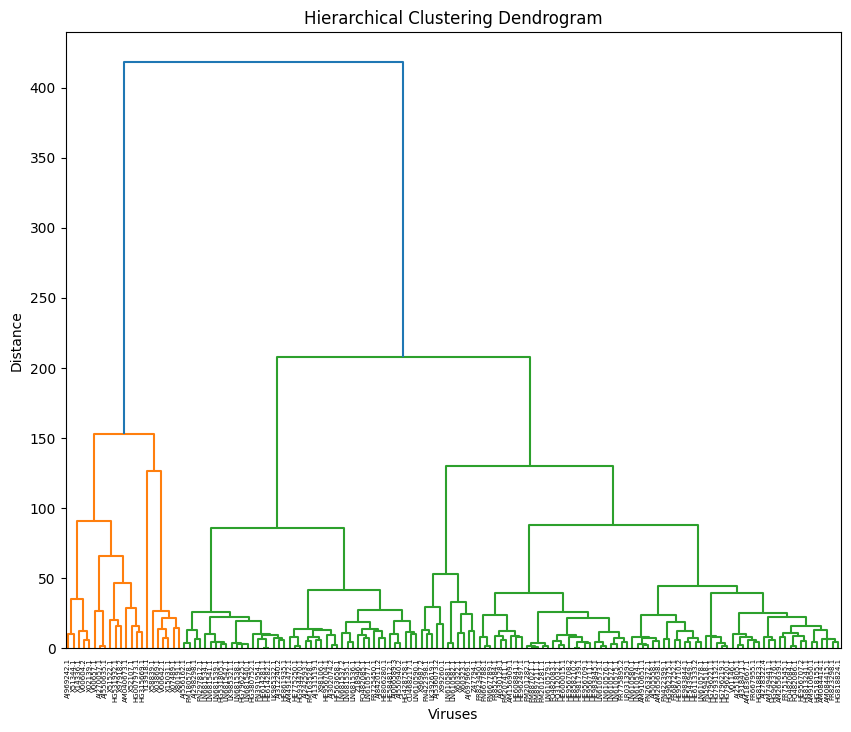

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import torch

# Assuming distance_matrix_torch is your distance matrix from the previous step
# If you're using the distance matrix computed by `torch.cdist`, convert it to numpy if necessary
#distance_matrix = distance_matrix_torch  # Shape: (num_viruses, num_viruses)

# Perform hierarchical clustering (Ward method)
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a heatmap with clustered order
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, 
            cmap='viridis', 
            xticklabels=virus_names, 
            yticklabels=virus_names, 
            square=True, 
            cbar_kws={'label': 'Distance'}, 
            linewidths=0.5)

# Add a title
plt.title('Virus Pairwise Distance Matrix (Clustering)')
plt.xlabel('Virus')
plt.ylabel('Virus')

# Show the plot
plt.show()

# Optional: If you want to plot the dendrogram (tree) on top of the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Plot dendrogram
dendrogram(linkage_matrix, labels=virus_names, ax=ax)

# Show dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Viruses')
plt.ylabel('Distance')
plt.show()


## Graph

In [50]:
# TURN THE CONTINGENCY TABLE INTO A GRAPH
import networkx as nx


G = nx.Graph()

# Add edges between Taxa and Hosts with weights
for taxon in distance_df.index:
    for host in distance_df.columns:
        weight = distance_df.loc[taxon, host]
        if weight > 0:  # Only add edges with positive weights
            G.add_edge(taxon, host, weight=weight)
#print(G.edges(data=True))

taxa = distance_df.index  # 50 host nodes
hosts = distance_df.columns  # 50 taxon nodes

# Color the nodes based on whether they are Taxa or Hosts
for node in G.nodes():
    if node in taxa:
        G.nodes[node]['color'] = 'lightgreen'  # Taxa nodes
    elif node in hosts:
        G.nodes[node]['color'] = 'lightblue'   # Host nodes


# ENSURE GRAPH IS A STANDARD INT OR FLOAT
# IPYSIGMA DOESN'T WORK OTHERWISE

for node, data in G.nodes(data=True):
    for key, value in data.items():
        if isinstance(value, (int, float)):
            data[key] = int(value) if isinstance(value, (int, float)) else str(value)  # Convert int/float to standard types

for u, v, d in G.edges(data=True):
    d['weight'] = int(d['weight'])



# Calculate the edge width based on weight
edges = G.edges(data=True)
weights = [d['weight'] for u, v, d in edges]
max_weight = max(weights)  # Normalize edge widths to maximum weight
edge_widths = [w / max_weight * 5 for w in weights]  # Scale edge width to a reasonable size


# PRINT THE GRAPH

pos = nx.spring_layout(G)  # pos is a dictionary of node positions

# Format positions as needed by ipysigma (x, y dict per node)
formatted_pos = {node: {'x': float(x), 'y': float(y)} for node, (x, y) in pos.items()}

from ipysigma import Sigma

Sigma.write_html(
    G,
    './phage_embds_graph.html',
    fullscreen=True,
    node_metrics=['louvain'],
    layout=formatted_pos,
    #node_color='louvain',
    raw_node_color='color',
    node_size_range=(3, 20),
    max_categorical_colors=30,
    default_edge_type='curve',
    node_border_color_from='node',
    default_node_label_size=14,
    edge_size=edge_widths,  # Use edge width scaling
    edge_color=weights,  # Optional: color the edges based on their weights
    node_size=G.degree
)


# Tree

In [58]:
from skbio.tree import TreeNode
from skbio.stats.distance import DistanceMatrix
from ete3 import Tree
import ete3

In [52]:
# Copied this function from skbio documentation because import didn't worked

def upgma(dm, weighted=False):
    r"""Perform unweighted pair group method with arithmetic mean (UPGMA) or its
    weighted variant (WPGMA) for phylogenetic reconstruction.

    Parameters
    ----------
    dm : skbio.DistanceMatrix
        The input distance matrix.
    weighted : bool, optional
        If True, WPGMA is performed instead of UPGMA. WPGMA is a variant of UPGMA
        which is unbiased towards the size of subtrees computed.

    Returns
    -------
    TreeNode
        A TreeNode object with estimated edge values.

    See Also
    --------
    nj

    Notes
    -----
    UPGMA is a hierarchical clustering method appearing as the `average` function
    in the SciPy package, where the linkage matrix produced by `average` is used
    to construct a TreeNode object. A weighted variant is known as WPGMA, and both
    variants are due to Sokal and Michener [1]_.

    References
    ----------
    .. [1] Sokal, R.R., & Michener, C.D. (1958). A statistical method for
       evaluating systematic relationships. University of Kansas science
       bulletin, 38, 1409-1438.

    Examples
    --------
    Define a distance matrix object for the taxa a, b, and c.

    >>> from skbio import DistanceMatrix

    >>> data = [[0, 1, 2],
    ...         [1, 0, 3],
    ...         [2, 3, 0]]
    >>> ids = list('abc')
    >>> dm = DistanceMatrix(data, ids)

    Construct a tree using UPGMA.

    >>> tree = upgma(dm)
    >>> print(tree.ascii_art())
              /-c
    ---------|
             |          /-a
              \--------|
                        \-b

    The tree also has estimated edge values assigned to each edge.

    >>> print(tree)
    (c:1.25,(a:0.5,b:0.5):0.75);
    <BLANKLINE>
    """
    # Ensure the input is a DistanceMatrix object
    if not isinstance(dm, DistanceMatrix):
        raise ValueError("Input must be a DistanceMatrix object.")

    # If weighted is set to 'False', UPGMA is performed
    if weighted is False:
        linkage_matrix = linkage(
            dm.condensed_form(), method="average", metric="euclidean"
        )
    # Otherwise, WPGMA is performed
    else:
        linkage_matrix = linkage(
            dm.condensed_form(), method="weighted", metric="euclidean"
        )

    # Construct the TreeNode from the linkage matrix
    tree = TreeNode.from_linkage_matrix(linkage_matrix, dm.ids)

    return tree

In [55]:


dm1 = DistanceMatrix(distance_df, distance_df.index)
tree1 = upgma(dm1)

# convert skbio tree into newick string
newick_s1 = str(tree1)
newick_s1 = newick_s1[:-1]

# #reate ete3 tree form newick string
ete_tree1 = Tree(newick_s1, format=1)
print("tree1:")
print(newick_s1)
print(ete_tree1)

tree1:
(Y13918.1:10.056687082367674,((((HG531932.1:4.241506518869317,(X51522.1:4.124358266484284,(((LN610581.1:0.9549398292293493,LN610582.1:0.9549398292293493):2.798491034687045,(X96987.2:2.749857880397434,(AJ697969.1:2.320665501229332,(LK392619.1:1.8098804065527618,Z47794.1:1.8098804065527618):0.51078509467657):0.42919237916810227):1.0035729835189602):0.2525595822840492,(X97918.2:3.8950864487639882,(((((LN681534.1:1.782796480857788,((LK985322.1:1.195730522353044,(HG531805.1:0.9828978526747925,(LN681539.1:0.934731467389317,(LN681541.1:0.6793230903746235,LN681542.1:0.6793230903746235):0.25540837701469354):0.048166385285475455):0.21283266967825143):0.4644995418977127,(FN391954.1:1.4642163626229285,(HE614281.1:0.08984686900646742,HE614282.1:0.08984686900646742):1.3743694936164612):0.19601370162782805):0.12256641660703149):0.1404689043696934,(HE956704.1:1.8313848818519944,((LK985321.1:0.6093604122444042,LN681538.1:0.6093604122444042):0.11784880540111853,(HG796225.1:0.634124894787707,LN681

In [61]:
ts = ete3.TreeStyle()
ts.show_branch_length = True
ts.show_branch_support = True
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_span= 180
ts.arc_start= -180

ete_tree1.show(tree_style=ts)
ete_tree1.render("philogeny.png")

{'nodes': [[0.5, 1160.382172472775, 4.5, 1164.382172472775, 0, None],
  [183.50000000000003, 8.5, 187.50000000000003, 12.5, 1, None],
  [62.593592558970876,
   2312.26434494555,
   66.59359255897087,
   2316.26434494555,
   2,
   None],
  [84.77985952654825,
   1918.6224398911,
   88.77985952654825,
   1922.6224398911,
   3,
   None],
  [97.40712491942769,
   1275.0261297821999,
   101.40712491942769,
   1279.0261297821999,
   4,
   None],
  [116.58323266465493,
   97.67725956439972,
   120.58323266465493,
   101.67725956439972,
   5,
   None],
  [195.5, 27.5, 199.5, 31.5, 6, None],
  [121.68001515938691,
   167.85451912879944,
   125.68001515938691,
   171.85451912879944,
   7,
   None],
  [198.5, 46.5, 202.5, 50.5, 8, None],
  [126.79862613699677,
   289.2090382575989,
   130.79862613699677,
   293.2090382575989,
   9,
   None],
  [134.31907352079128, 97.5625, 138.31907352079128, 101.5625, 10, None],
  [187.40797278930407, 75.0, 191.40797278930407, 79.0, 11, None],
  [207.50000000000